In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from sklearn.datasets import load_iris
iris = load_iris()

In [113]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [114]:
iris_features = iris.feature_names

In [115]:
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [116]:
df_data = pd.DataFrame(iris.data, columns = iris_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [117]:
data=pd.concat([df_data,df_labels],axis=1)

In [118]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


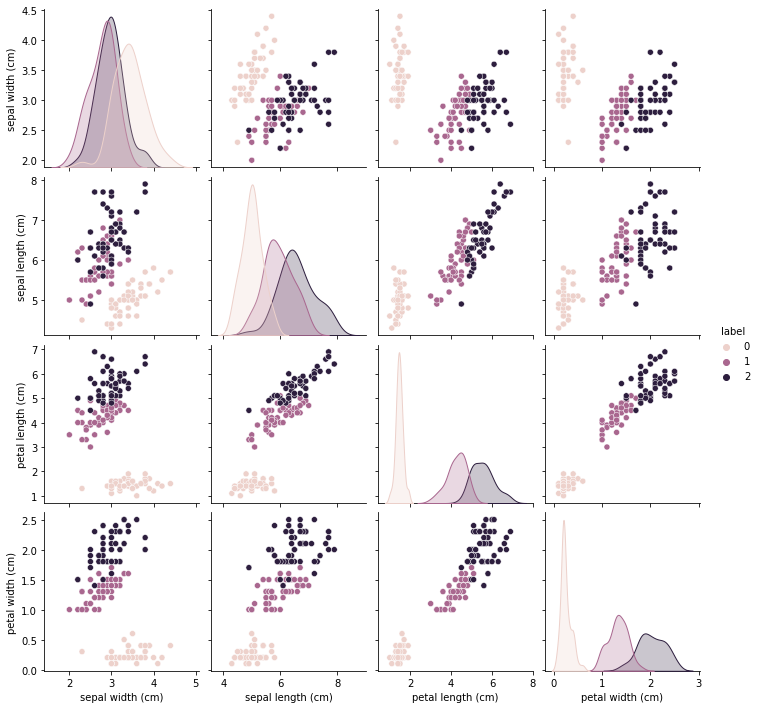

In [119]:
import seaborn as sns

sns.pairplot(data,
             vars=['sepal width (cm)','sepal length (cm)','petal length (cm)','petal width (cm)'],
            hue ='label')
plt.show()

<AxesSubplot:xlabel='label', ylabel='sepal width (cm)'>

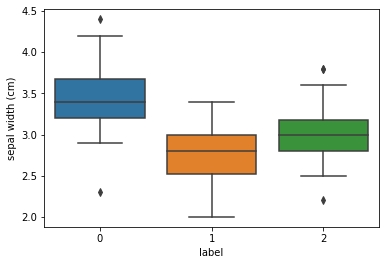

In [120]:
sns.boxplot(x='label',y='sepal width (cm)',data=data)

In [148]:
n_features = 1
X = data.iloc[:,0:4].values

In [149]:
#Splitting the data into training and test test
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = data.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [150]:
X

array([[[5.1],
        [3.5],
        [1.4],
        [0.2]],

       [[4.9],
        [3. ],
        [1.4],
        [0.2]],

       [[4.7],
        [3.2],
        [1.3],
        [0.2]],

       [[4.6],
        [3.1],
        [1.5],
        [0.2]],

       [[5. ],
        [3.6],
        [1.4],
        [0.2]],

       [[5.4],
        [3.9],
        [1.7],
        [0.4]],

       [[4.6],
        [3.4],
        [1.4],
        [0.3]],

       [[5. ],
        [3.4],
        [1.5],
        [0.2]],

       [[4.4],
        [2.9],
        [1.4],
        [0.2]],

       [[4.9],
        [3.1],
        [1.5],
        [0.1]],

       [[5.4],
        [3.7],
        [1.5],
        [0.2]],

       [[4.8],
        [3.4],
        [1.6],
        [0.2]],

       [[4.8],
        [3. ],
        [1.4],
        [0.1]],

       [[4.3],
        [3. ],
        [1.1],
        [0.1]],

       [[5.8],
        [4. ],
        [1.2],
        [0.2]],

       [[5.7],
        [4.4],
        [1.5],
        [0.4]],

       [

In [151]:
X.shape

(150, 4, 1)

In [152]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [153]:
n_steps = X.shape[1]
n_steps

4

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [155]:
model =Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

print("input_shape => ", n_steps, n_features)
model.summary()    

input_shape =>  4 1
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 3, 64)             192       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 50)                3250      
                                                                 
 dense_42 (Dense)            (None, 50)                2550      
                                                                 
 dense_43 (Dense)            (None, 3)                 153       
                                 

C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [156]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 1.0891 - accuracy: 0.4250 - val_loss: 1.0663 - val_accuracy: 0.5667
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8904 - accuracy: 0.7000 - val_loss: 0.8011 - val_accuracy: 0.6667
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7750 - val_loss: 0.4099 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8750 - val_loss: 0.3349 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.7333 - val_loss: 0.2115 - val_accuracy: 0.9667
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.8167 - val_loss: 0.2037 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.7917 - val_loss: 0.5967 - val_accuracy: 0.6333
Epoch 8/100
8/8 [=========

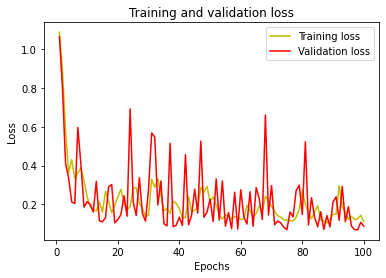

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

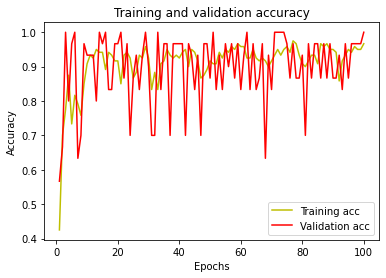

In [158]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [159]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
